# Lista Calculo 2


**Bibliotecas importadas**

In [2]:
from sympy import *
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

Exercicio 7 do apostol

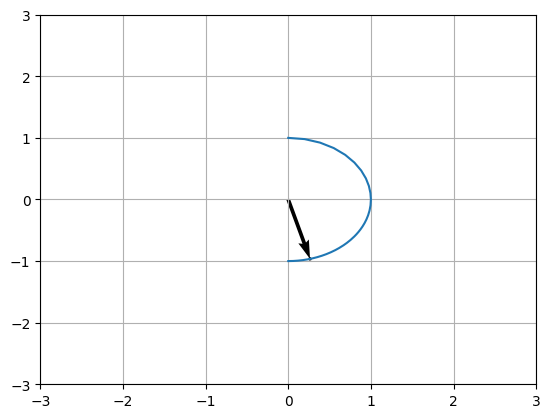

In [73]:
def exercicio1_7():
    x = symbols('x')
    exprecao =  2*x/(1+x**2)
    exprecao2 = (1-x**2)/(1+x**2)
    de1 = diff(exprecao,x,1)
    de2 = diff(exprecao2,x,1)


    f1 = lambdify(x, exprecao, modules = 'math')
    g1 = lambdify(x, exprecao2, modules = 'math')
    df1 = lambdify(x, de1, modules = 'math')
    dg1 = lambdify(x, de2, modules = 'math')


    fig, ax = plt.subplots()

    ax.set_xlim(-3,3)
    ax.set_ylim(-3,3)

    xval = [f1(y/10) for y in range(50000)]
    yval = [g1(y/10) for y in range(50000)]


    ax.grid(True)
    ax.plot(xval,yval)

    seta_pos = ax.quiver(0,0,0,0,scale = 1, scale_units = 'xy', angles = 'xy')
    seta_velocidade = ax.quiver(0,0,0,0,scale = 1, scale_units = 'xy', angles = 'xy')


    def  funcao(frames,seta_pos,seta_velocidade):
        seta_velocidade.set_UVC(df1(frames/20),dg1(frames/20))
        seta_velocidade.set_offsets([f1(frames/20),g1(frames/20)])

        seta_pos.set_UVC(f1(frames/20),g1(frames/20))

        return seta_pos, seta_velocidade,





    animacao2 = FuncAnimation(fig = fig, func = funcao, frames = 150, interval = 50, blit = True, fargs=(seta_pos,seta_velocidade))

    animacao2.save('Questão 1_7.gif', writer = 'pillow', fps = 20)

exercicio1_7()


Exercicio 2 

True

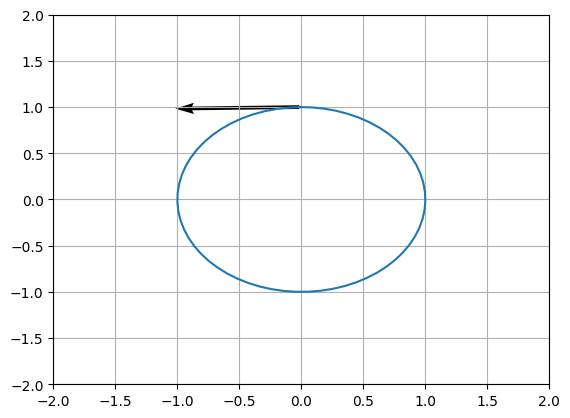

In [76]:

def exercicio2():
    def funcoes():
        x  = Symbol('x')
        xexpr = -sin(x)
        yexpr = cos(x)
        xderiv = diff(xexpr)
        yderiv = diff(yexpr)
        xderiv2 =diff(xderiv)
        yderiv2 = diff(yderiv)


        f = lambdify(x,xexpr, modules='math')
        g = lambdify(x,yexpr, modules = 'math')
        fx = lambdify(x,xderiv, modules = 'math')
        gx = lambdify(x, yderiv, modules = 'math')
        fxx = lambdify(x,xderiv2, modules = 'math')
        gxx = lambdify(x, yderiv2, modules = 'math')

        return f,g,fx,gx,fxx,gxx

    f, g, fx, gx, fxx, gxx = funcoes()

    fig, ax = plt.subplots()
    ax.set_xlim(-2,2)
    ax.set_ylim(-2,2)


    def circulo():
        xval = []
        yval = []
        circulo, = ax.plot(xval,yval)
        return circulo,xval, yval
    def seta():
        seta = ax.quiver(0,0,0,0, angles = 'xy', scale_units = 'xy', scale = 1)
        return seta

    circulo, xval , yval = circulo()


    def atua(frames, circulo,xval,yval, seta):
            

        xval.append(f(frames/10))
        yval.append(g(frames/10))

        seta.set_UVC(fx(frames/10),gx(frames/10))
        seta.set_offsets([xval[-1],yval[-1]])

        circulo.set_data(xval,yval)

        return circulo, seta,


    ax.grid(True)
    ani = FuncAnimation(fig = fig, func = atua,frames = 64 , interval = 200, fargs= (circulo, xval, yval, seta()))
    ani.save("Questão_2.gif", writer="pillow", fps=20)
    return True

exercicio2()





Exercicio 3

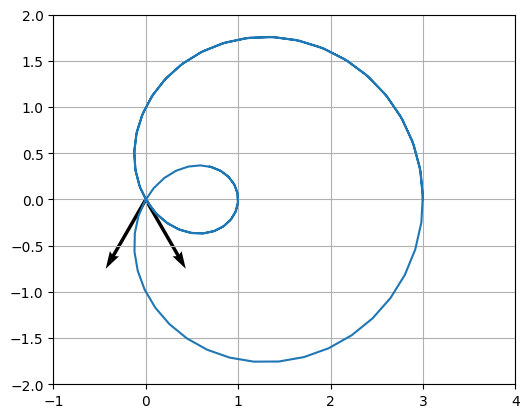

In [74]:
def Exercicio3():

    x  = Symbol('x')
    expr1 = (1+ 2*cos(x))*cos(x)
    expr2 = (1+2*cos(x))*sin(x)
    dexpr1 = diff(expr1)
    dexpr2 = diff(expr2)


    f =lambdify(x,expr1, modules = 'math')
    g = lambdify(x, expr2, modules = 'math')
    fxx = lambdify(x,dexpr1, modules = 'math')
    gxx = lambdify(x, dexpr2, modules = 'math')


    fig, ax = plt.subplots()
    ax.set_xlim(-1,4)
    ax.set_ylim(-2,2)
    ax.set_aspect('equal')

    x_val = [f(i/10) for i in range(100)]
    y_val = [g(i/10) for i in range(100)]
    ax.grid(True)
    ax.plot(x_val, y_val)
    ax.quiver(0,0,fxx(2*pi/3),gxx(2*pi/3), angles = 'xy', scale = 2, scale_units = 'xy')
    ax.quiver(0,0,fxx(4*pi/3),gxx(4*pi/3), angles = 'xy', scale = 2, scale_units = 'xy')

Exercicio3()

Exericio 7

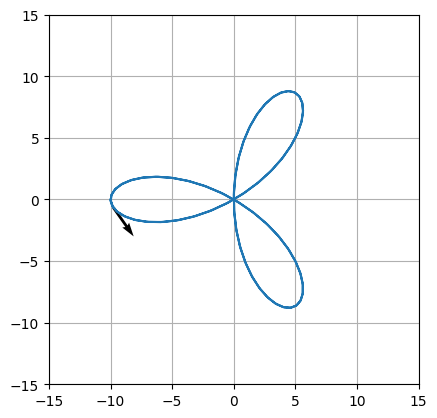

In [12]:

def exercicio7():
    x = symbols('x')

    expr5 = 10*cos(x)**2*(4*sin(x)**2-1)
    expr6 = 10*cos(x)*(4*sin(x)**2-1)*sin(x)
    dexpr5 = diff(expr5,x,1)
    dexpr6 = diff(expr6,x,1)


    rx = lambdify(x,expr5, modules='math')
    ry = lambdify(x,expr6, modules='math')
    drx = lambdify(x,dexpr5, modules='math')
    dry = lambdify(x,dexpr6, modules='math')

    fig , ax = plt.subplots()

    xval = []
    yval = []



    grafico, = ax.plot(xval,yval)
    seta = ax.quiver(0,0,0,0, angles = 'xy', scale_units = 'xy', scale = 4)


    ax.grid()
    ax.set_aspect('equal')
    '''c = 0
    frameslist = []'''
    def funcao(frames,xval,yval):
        xval.append(rx(frames/20))
        yval.append(ry(frames/20))
        
        grafico.set_data(xval,yval)

        seta.set_UVC(drx(frames/20),dry(frames/20))
        seta.set_offsets([rx(frames/20),ry(frames/20)])

        return seta, grafico,    
        
        """if frames < 64:
            xval.append(rx(frames/20))
            yval.append(ry(frames/20))
            grafico.set_data(xval,yval)
            frameslist.append(int(frames))
            return grafico,
        else:
            a = rx(frameslist[c])/20
            b = ry(frameslist[c]/20)
            
            seta.set_UVC(drx(int(frameslist[c])/20),dry(int(frameslist[c])/20))
            seta.set_offsets([a,b])   
            c += 1
            return seta,"""


    ax.set_xlim(-15,15)
    ax.set_ylim(-15,15)

    animacao = FuncAnimation(fig = fig, func = funcao, frames = 128, interval = 50, blit = True, fargs=(xval,yval))


    animacao.save('Questão_7.gif', writer = 'pillow', fps = 20)


exercicio7()




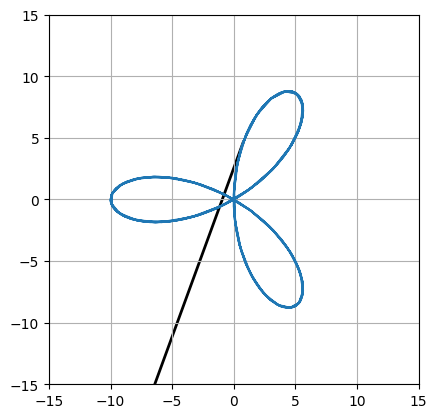

In [11]:

def exercicio7nv():
    x = symbols('x')
    expr5 = 10*cos(x**2)**2*(4*sin(x**2)**2-1)
    expr6 = 10*cos(x**2)*(4*sin(x**2)**2-1)*sin(x**2)
    dexpr5 = diff(expr5,x,1)
    dexpr6 = diff(expr6,x,1)


    rx = lambdify(x,expr5, modules='math')
    ry = lambdify(x,expr6, modules='math')
    drx = lambdify(x,dexpr5, modules='math')
    dry = lambdify(x,dexpr6, modules='math')

    fig , ax = plt.subplots()

    xval = []
    yval = []



    grafico, = ax.plot(xval,yval)
    seta = ax.quiver(0,0,0,0, angles = 'xy', scale_units = 'xy', scale = 4)


    ax.grid()
    ax.set_aspect('equal')
    '''c = 0
    frameslist = []'''
    def funcao(frames,xval,yval):
        xval.append(rx(frames/80))
        yval.append(ry(frames/80))
        
        grafico.set_data(xval,yval)

        seta.set_UVC(drx(frames/80),dry(frames/80))
        seta.set_offsets([rx(frames/80),ry(frames/80)])

        return seta, grafico,    
        
        """if frames < 64:
            xval.append(rx(frames/20))
            yval.append(ry(frames/20))
            grafico.set_data(xval,yval)
            frameslist.append(int(frames))
            return grafico,
        else:
            a = rx(frameslist[c])/20
            b = ry(frameslist[c]/20)
            
            seta.set_UVC(drx(int(frameslist[c])/20),dry(int(frameslist[c])/20))
            seta.set_offsets([a,b])   
            c += 1
            return seta,"""


    ax.set_xlim(-15,15)
    ax.set_ylim(-15,15)

    animacao = FuncAnimation(fig = fig, func = funcao, frames = 300, interval = 50, blit = True, fargs=(xval,yval))


    animacao.save('Questão_7_repar.gif', writer = 'pillow', fps = 20)


exercicio7nv()


